# Data Analysis Project -- Prison Break

## Background

This analysis is based on a short [Wikipedia article](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) about attempted escapes from different prisons around the world using helicopters.

We will analyze the data from the article using Python, and our analysis will aim to answer the following questions:

* In which year did the most helicopter prison break attempts occur?
* In which countries did the most attempted helicopter prison breaks occur?
* In which countries do helicopter prison breaks have a higher chance of success?
* How does the number of escapees affect the success?
* Which escapees have attempted prison breaks more than once?

**We begin by importing the following Python modules to aid our analysis:**

* ```IPython.display``` for displaying data (interactive computing with other programming languages - in our case, HTML),
* ```Pandas``` for converting the dataset into a dataframe and manipulating it to extract information,
* ```Re``` for matching regular expressions in the data, and
* ```Matplotlib``` for creating data visualizations.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import display, HTML

**Next, we'll extract the data from the url page by executing the following code:**

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
df = pd.read_html(url)[1]
data = df.to_numpy().tolist()

The information is now stored in the ```data``` variable and ready to be analysed. 

We also note that each column in the data has the following headers:

* Date - The date on which the escape was attempted
* Prison Name - The prison from which the escape was attempted
* Country - The country where the prison is located
* Succeeded - Whether the attempt succeeded or not
* Escapee(s) - The names of the prisoner(s) that attempted the escape
* Details - More information about the escape attempt.

**Let's explore the data:**

In [3]:
# display the first 3 rows

for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

Upon reviewing the data, we see that the **"Details"** (last) column makes the data appear bogus and is surplus to requirement for our analysis, so we will proceed to remove it.

In [4]:
# retain only the first 5 columns, and display the first 3 rows

index = 0
for row in data:
    data[index] = row[:5]
    index += 1

print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


Our data is now easier to look at. 

Now, let's proceed to answer our analysis questions.

The first question is: **In which year did the most helicopter prison break attempts occur?**

## 1. Escape attempts per year

To answer this question, we will start by isolating the years in the "Date" column.

In [5]:
# remove the month and day from the "Date" column, and display the first 3 rows

for row in data:
    row[0] = int(re.findall("\d{4}", row[0])[0])
    
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


**Awesome!**

Next we will compute the frequency of attempted escapes for each year. But before we achieve that, let us first tranform the years into a list and also get the range of the years.

In [6]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

years = []
for y in range(min_year, max_year + 1):
    years.append(y)

print (min_year)
print (max_year)
print (years[:4], "...", years[-4:])

1971
2020
[1971, 1972, 1973, 1974] ... [2017, 2018, 2019, 2020]


**We can see from the result above that the years range from 1971 to 2020. In other words, the data spans a 50-year period.**

Let us now will now structure the years into a new list of lists in a way that will allow us see the number of attempts for each year.

In [7]:
# set the initial attempts per year to zero.

attempts_per_year = []
for year in years:
    attempts_per_year.append([year, 0])

print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


Great!

Now, let's update the actual number of attempts for each year. We expect the results in the updated attempts_per_year list to reflect the actual number of attempts from our original "Data" list. From this list, we will be able to identify the year with the most escape attempts.

In [8]:
# update frequency of attempts per year

for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1

print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


Looks good so far!

However, for better visualization, we will plot our list of lists on a chart.

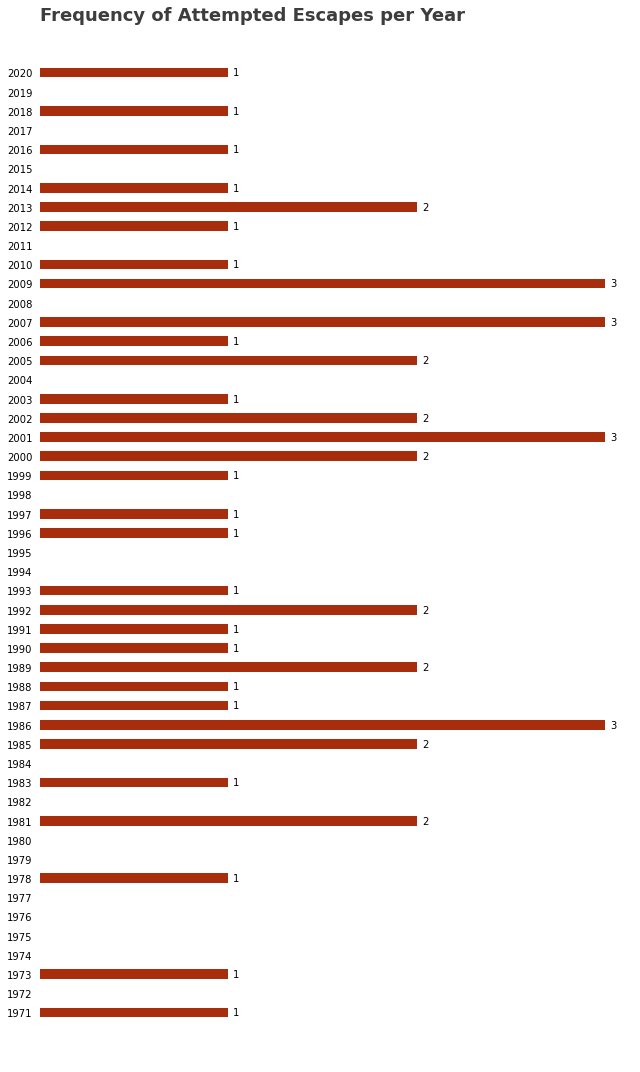

In [9]:
# retrieve the parameters for our chart from the list of lists
p = {ya[0]:ya[1] for ya in attempts_per_year}


# Next, customize the chart elements to enhance readability

plt.figure(figsize=(9,15))  # Increase chart size

axes = plt.axes()
axes.get_xaxis().set_visible(False)  # Remove the x-axis

axes.tick_params(tick1On=False)  # Remove the border-ticks on each axis
plt.yticks(list(p.keys()), list(p.keys()))  # Display all the parameters (years) on the y-axis

spines = axes.spines
spines['top'].set_visible(False)
spines['right'].set_visible(False)
spines['bottom'].set_visible(False)
spines['left'].set_visible(False)   # Remove all borders from the chart

plt.title("Frequency of Attempted Escapes per Year", loc='left', pad=0, 
          fontsize=18, fontweight='bold', color="#3D3D3D") # Add the chart title


# Next, create the plot on a horizontal bar chart
ax = plt.barh(*zip(*p.items()), height=0.5, color="#A72D0C")


# Finally, customize the barplots to include the labels (number of attempted escapes) and further improve readability
rectangles = ax.patches
for rectangle in rectangles:
    x_value = rectangle.get_width()
    y_value = rectangle.get_y() + rectangle.get_height() / 2
    space = 5
    ha = 'left'
    label = "{}".format(x_value)
    if x_value > 0:
        plt.annotate(
            label,
            (x_value, y_value),
            xytext=(space, 0),
            textcoords="offset points",
            va='center',
            ha=ha)

plt.tight_layout()     #  display the chart to fit into the figure area

Much better! 

Now we can easily tell that the years with the highest number of attempts are: **```1986```**, **```2001```**, **```2007```** and **```2009```**.

Let's proceed to answer the second question: 
**In which countries did the most attempted helicopter prison breaks occur?**

## 2. Countries with the most escape attempts

To answer this question, we'll look at a list of the unique countries in our dataset, as well as the frequency of attempts for each of them. **Our aim here is to display the result in a tabular format with column headers and html-styling**.

Recall that we previously transformed our prison escape data to a dataframe and assigned it to a variable called **```df```**. We will use the pandas method ```series.value_counts()``` to manipulate this dataframe in order to generate a frequency list that contains the number of attempts per country automatically sorted in descending order.

In [10]:
# generate frequency list for attempts per country
country_frequency = df.Country.value_counts()

countries = country_frequency.index   # extract the index (countries) from the frequency list
attempts = country_frequency.values   # extract the frequency of occurence for each country 

country_frequency_dict = {"Country": countries, "Number of Attempts": attempts}  # store the extracted data in dictionary form

display(HTML(pd.DataFrame(country_frequency_dict).to_html(index=False)))  # display result in a table with column headers.

Country,Number of Attempts
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1


Looks good!

**To better understand the distribution of the escape attempts for each country, let us visualize this result on a pie chart:**

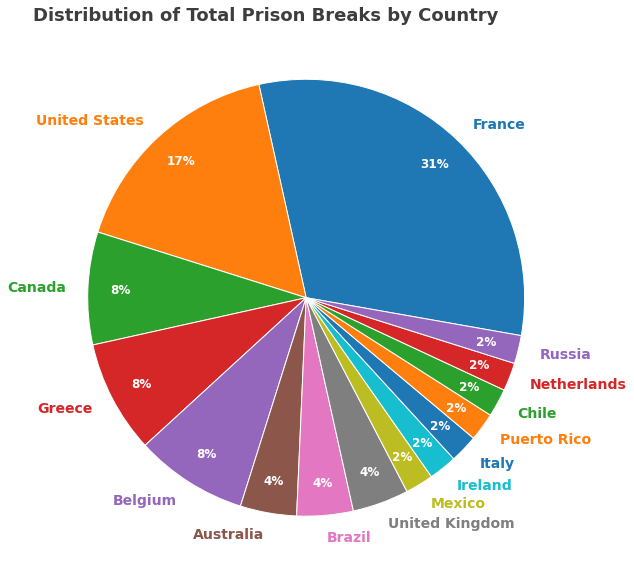

In [11]:
fig, ax = plt.subplots(figsize= (9,15))   # initiate plot and set chart size 

# plot the pie chart and set the parameters
patches, texts, pcts = ax.pie(country_frequency, labels=countries, autopct='%.0f%%', startangle=350, pctdistance=0.85, 
                              wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})   

ax.set_title("Distribution of Total Prison Breaks by Country", loc='left', pad=0.0, 
             fontsize=18, fontweight='bold', color="#3D3D3D")   # set chart title

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())   # set chart labels to adopt corresponding patch color

plt.setp(pcts, color='white', weight= 'bold', size=12)   # format the numeric labels for each pie
plt.setp(texts, fontweight=600, fontsize=14)    # format the text labels for each pie

plt.tight_layout()    # display the chart to fit into the figure area

Great! 

So, we can see that **```France```** ranked highest with a total of 15 prison break attempts; and this represents about 31% of the total escape attempts across all countries.

We now move on to the next question for our analysis: **In which countries do helicopter prison breaks have a higher chance of success?**

## 3. Countries with the most successful attempts

To answer this question, we will first compute the total successful escape attempts per country:

In [12]:
escape_success = (df[df["Succeeded"]=="Yes"]).Country.value_counts()

print(escape_success)

France            11
United States      6
Canada             3
Brazil             2
Greece             2
Belgium            2
Mexico             1
Ireland            1
Italy              1
United Kingdom     1
Puerto Rico        1
Chile              1
Australia          1
Russia             1
Name: Country, dtype: int64


Next, we will determine the success rate per country by expressing the successful attempts per country divided by the total attempts per country as a percentage:

In [13]:
escape_success_rate = round(escape_success / country_frequency * 100, 1)

print(escape_success_rate)

Australia          50.0
Belgium            50.0
Brazil            100.0
Canada             75.0
Chile             100.0
France             73.3
Greece             50.0
Ireland           100.0
Italy             100.0
Mexico            100.0
Netherlands         NaN
Puerto Rico       100.0
Russia            100.0
United Kingdom     50.0
United States      75.0
Name: Country, dtype: float64


Nice!

**Notice the value for the Netherlands? It means that there have been no successful attempts in that country!**

Let's go ahead and visualize this result:

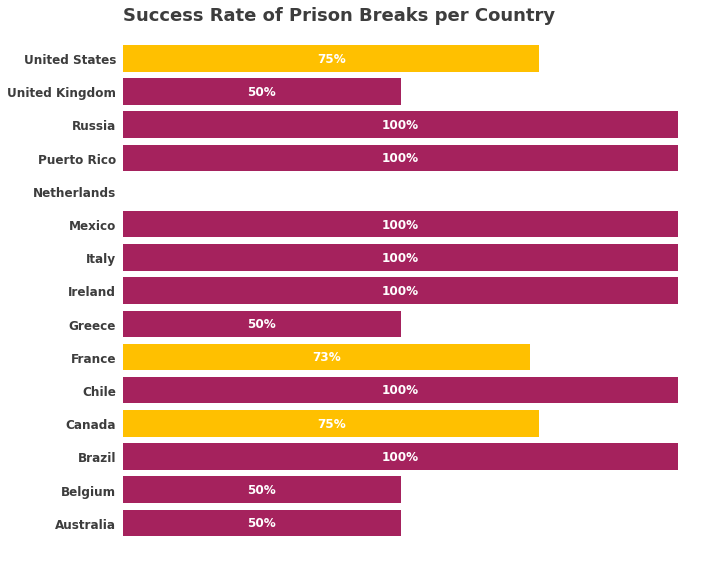

In [14]:
# visualize the escape success rate on a bar chart 
fig, ax = plt.subplots(figsize= (10,8))
labels = escape_success_rate.index
values = escape_success_rate.values
colors = ("#A5225D", "#A5225D", "#A5225D", "#FFC000", "#A5225D", "#FFC000", "#A5225D", 
          "#A5225D", "#A5225D", "#A5225D", "#A5225D", "#A5225D", "#A5225D", "#A5225D", "#FFC000")

bars = ax.barh(labels, values, color=colors) 
ax.set_title("Success Rate of Prison Breaks per Country", loc='left', pad=0.0, 
             fontsize=18, fontweight='bold', color="#3D3D3D")   # set chart title

ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.bar_label(bars, fontsize=12, fontweight='bold', color="#FFFFFF", label_type="center", fmt="%.0f%%")

for spine in ax.spines:
    ax.spines[spine].set_visible(False)

plt.yticks(color="#3D3D3D", fontweight='bold', fontsize='12')
plt.tight_layout()

Interesting!

**We can see that even though France has the highest number of attempts, the odds of a successful prison break are about the same with countries like the United States and Canada with significantly lower attempts.** 

**There is also a 50% chance that escape attempts in Australian, Belgian, Greek, and UK prisons would be successful.**

Now to the next question: **How does the number of escapees affect the success?**

## 4. Successful Escapes Vs. Number of Escapees

To answer this question, we will:

1. Determine the number of successful prison breaks vs. unsuccessful ones
2. Explore the relationship between the number of escapees for each attempt and the success of the attempt.

First, let's us compute and visualize the number of escapes that succeeded and those that did not succeed:

Yes    34
No     14
Name: Succeeded, dtype: int64


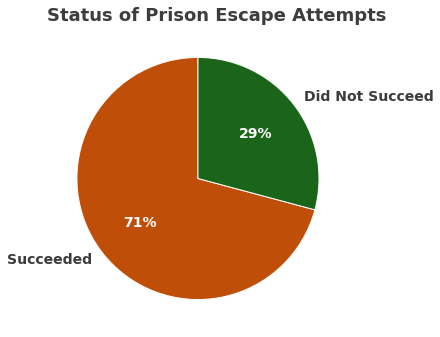

In [15]:
# compute and display status of total escape attempts
escape_status = df.Succeeded.value_counts()
print(escape_status)

# visualize status of total escape attempts
fig, ax = plt.subplots(figsize= (6,6)) 
patches, texts, pcts = ax.pie(escape_status, labels=("Succeeded", "Did Not Succeed"), autopct='%.0f%%', startangle=90,
                              wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}, colors=("#BF4E08","#1A651A"))  

ax.set_title("Status of Prison Escape Attempts", loc='left', fontsize=18, fontweight='bold', color="#3D3D3D")
plt.setp(pcts, color='white', weight= 'bold', size=14)
plt.setp(texts, fontweight=600, fontsize=14, color="#3D3D3D")

plt.tight_layout()

**The results show that the number of successful escapes was nearly 2.5 times the number of unseccessful ones; and the successful escapes made for 71% of the total attempts in the period under review.** 

Next, we will try to identify the number of escapees for each escape attempt in our dataset. 

**Upon reviewing the data, we know that escapees are listed by their first and last names. Therefore, if we split the string of names in the "Escapee(s)" column into separate strings of words, we can expect exactly 2 words for single escapees, and more than 2 words for two or more escapees.**

We will execute this now. 

But before that let's eliminate the parentheses from the "Escapee(s)" column name by renaming it to "Escapees" so that it doesn't throw up errors during computing:

In [16]:
df.rename(columns={'Escapee(s)':'Escapees'}, inplace=True)
df[:1]

,Date,Prison name,Country,Succeeded,Escapees,Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...


Awesome.

Now, let's split the escapee names into separate words and return the number of words for each row.

*Note that for prison breaks where the names of the escapees are not known, there's a "---" in the data. The operation above will return a value of 1 for these rows. So we'll also be replacing the 1s with 0s to indicate unknown escapees.*

In [17]:
#  split escapee names, return the number of words and record it in a new column called "Num_Escapees"
df["Num_Escapees"] = df["Escapees"].str.split().apply(len)  

df["Num_Escapees"] = df["Num_Escapees"].replace([1],[0])   #  replace 1s with 0s in the Num_Escapees column

df.iloc[[1,2,5,17,18,46,47], [4, 6]]    #  display select rows and columns to show the changes made

,Escapees,Num_Escapees
1,JB O'Hagan Seamus TwomeyKevin Mallon,5
2,Garrett Brock TrapnellMartin Joseph McNallyJam...,7
5,David McMillan,2
17,—,0
18,—,0
46,Rédoine Faïd,2
47,Kristel A.,2


Looks good.

However, as it is, the data in the Num_Escapees column does not exactly serve our purpose. To make the data more helpful, we will categorize the column into "One Escapee", "Two or More Escapees", and "Unknown".

To achieve this, we will create a function called "condition" and apply it to the Num_Escapees column using the ```series.apply()``` method.

In [18]:
# create function
def condition(e):
    if e==0:
        return "Unknown"
    elif e==2:
        return "One Escapee"
    else:
        return "Two or More Escapees"

# apply the function to Num_Escapees column
df["Num_Escapees"] = df["Num_Escapees"].apply(condition)

df.iloc[[1,2,5,17,18,46,47], [4, 6]]      #  display select rows and columns to show the changes made

,Escapees,Num_Escapees
1,JB O'Hagan Seamus TwomeyKevin Mallon,Two or More Escapees
2,Garrett Brock TrapnellMartin Joseph McNallyJam...,Two or More Escapees
5,David McMillan,One Escapee
17,—,Unknown
18,—,Unknown
46,Rédoine Faïd,One Escapee
47,Kristel A.,One Escapee


Great!

Next, let us now compute and visualize the total **successful** escapes for each "Num_Escapees" category to see the relationship:

Two or More Escapees    20
One Escapee             11
Unknown                  3
Name: Num_Escapees, dtype: int64


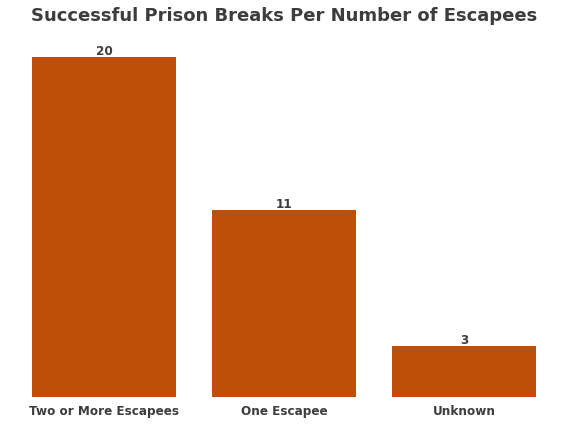

In [19]:
# compute total successful escapes for each Num_Escapees category
num_successful_esc = (df[df["Succeeded"]=="Yes"]).Num_Escapees.value_counts()
print(num_successful_esc)

# visualize the result on a column chart
fig, ax = plt.subplots(figsize= (8,6))
x = num_successful_esc.index
y = num_successful_esc.values
bars = ax.bar(x=x, height=y, color="#BF4E08")
ax.set_title("Successful Prison Breaks Per Number of Escapees", pad=20, fontsize=18, fontweight='bold', color="#3D3D3D")
ax.tick_params(left=False, bottom=False, labelleft=False)
ax.bar_label(bars, fontsize=12, fontweight='bold', color="#3D3D3D")

for spine in ax.spines:
    ax.spines[spine].set_visible(False)

plt.xticks(color="#3D3D3D", fontweight='bold', fontsize='12')
plt.tight_layout()

**We can see from the results that the number od successful escapes involving two or more people is almost twice as much as successful escapes involving one person. This implies that  prison breaks that are planned and executed by two or more people are 2x more likely to succeed.**

Finally, let's compute and visualize the total **unsuccessful** escapes for each "Num_Escapees" category to see the relationship:

One Escapee             7
Unknown                 4
Two or More Escapees    3
Name: Num_Escapees, dtype: int64


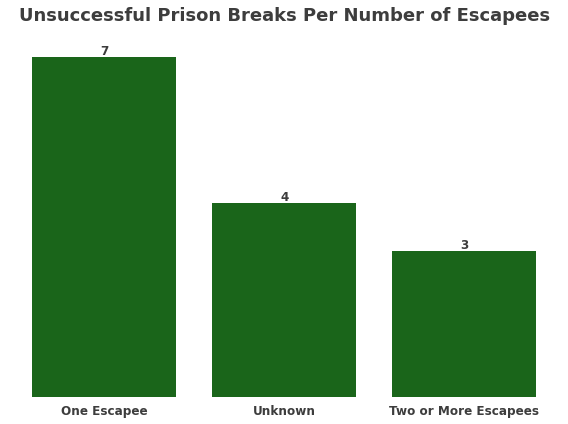

In [20]:
# compute total unsuccessful escapes for each Num_Escapees category
num_unsuccessful_esc = (df[df["Succeeded"]=="No"]).Num_Escapees.value_counts()
print(num_unsuccessful_esc)

# visualize the result on a column chart
fig, ax = plt.subplots(figsize= (8,6))
x = num_unsuccessful_esc.index
y = num_unsuccessful_esc.values
bars = ax.bar(x=x, height=y, color="#1A651A")
ax.set_title("Unsuccessful Prison Breaks Per Number of Escapees", pad=20, fontsize=18, fontweight='bold', color="#3D3D3D")
ax.tick_params(left=False, bottom=False, labelleft=False)
ax.bar_label(bars, fontsize=12, fontweight='bold', color="#3D3D3D")

for spine in ax.spines:
    ax.spines[spine].set_visible(False)

plt.xticks(color="#3D3D3D", fontweight='bold', fontsize='12')
plt.tight_layout()

**Given the previous result, it's no surprise to see that majority of the failled escape attempts involved only one prisoner. Only less than 50% of that number involved two or more people.**

Now, to the last question of this project: **Which escapees have attempted prison breaks more than once?**

## 5. Escapees that have attempted more than once

To anwer this question we will explore the "Escapees" column to identify the prisoners whose names appear more than once. 

To achieve this we will leverage the ```series.duplicated()``` method.

In [21]:
df[df["Escapees"].duplicated()]

,Date,Prison name,Country,Succeeded,Escapees,Details,Num_Escapees
18,December 1992,"Touraine Central Prison, Tours",France,No,—,The would-be escapee was shot dead by prison g...,Unknown
19,"June 17, 1993","Touraine Central Prison, Tours",France,No,Michel Vaujour,Vaujour and his wife were imprisoned in 1991. ...,One Escapee
21,"September 18, 1997",De Geerhorst jail,Netherlands,No,—,"A September 18, 1997 escape attempt ended in f...",Unknown
24,"December 13, 2000",Lyon prison,France,Yes,—,Three men were able to escape a prison near Ly...,Unknown
27,"May 28, 2001",Fresnes prison,France,No,—,(Although not a helicopter escape in the trues...,Unknown
28,"January 17, 2002",Parada Neto Penitentiary,Brazil,Yes,—,A helicopter was flown into Parada Neto Penite...,Unknown
31,July 2005,France,France,No,—,A helicopter escape attempt was foiled when al...,Unknown
35,"July 15, 2007",Grasse prison,France,Yes,Pascal Payet,"Pascal Payet, 43, escaped for the third time f...",One Escapee


To further refine our result, let us:

1. Pass the ```keep=False``` parameter into the ```series.duplicated()``` method to return all instances of the duplicates
2. Filter out the unknown escapees

In [22]:
df[(df["Escapees"].duplicated(keep=False)) & (df["Num_Escapees"] != "Unknown")]

,Date,Prison name,Country,Succeeded,Escapees,Details,Num_Escapees
8,"May 26, 1986",Prison de la Santé,France,Yes,Michel Vaujour,Vaujour had 28 years to serve for attempted mu...,One Escapee
19,"June 17, 1993","Touraine Central Prison, Tours",France,No,Michel Vaujour,Vaujour and his wife were imprisoned in 1991. ...,One Escapee
25,"January 19, 2001",Luynes prison,France,Yes,Pascal Payet,Pascal Payet escaped from Luynes prison using ...,One Escapee
35,"July 15, 2007",Grasse prison,France,Yes,Pascal Payet,"Pascal Payet, 43, escaped for the third time f...",One Escapee


Fantastic!

**We can now see that ```Michel Vaujour``` attempted twice in 1986 and 1993, and ```Pascal Payet``` also attempted twice in 2001 and 2007. All instances occurred at four different French prisons; and while both of Payet's attempts were successful, Vaujour's second attempt was unsuccessful.** 

## Conclusion

At the begin of this project, we sought to explore the prison escapes in 15 countries over a 50-year period. We used several Python frameworks and modules such as pandas and matplotlib to analyze and visualize the data. By the end of the project, we were able to ascertain that: 

* Not more than three (3) escape attempts occured in a given year throughout the period, and only one (1) escape attempt was most likely to occur per year, and

* France, being the country with the highest number of escape attempts (15), had nearly double the number of attempts in the United States (8) which ranked second on the list.

* Even though France recorded the highest priscon escape attempts, the success rate of prison breaks was about the same for countries like the United States and Canada with significantly lesser escape attempts.

* Prison Breaks are twice as likely to be successful with two or more escapees than one escapee.

* Pascal Payet was the only prisoner in the 50-year period to attempt two successful prison breaks.

### END.